In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 10.2 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting un

In [2]:
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

# Returns Dataframe of company: (index) Date, Open, High, Low, Close, Volume, Dividends, Stock Splits
def getStockHistory(stockName, timeDiffInYears=1):
  tickerInstance = yf.Ticker(stockName)
  end_date = datetime.now().strftime('%Y-%m-%d')
  start_date = ( datetime.now() - timedelta(days= 365.24 * timeDiffInYears) ).strftime('%Y-%m-%d')
  history = tickerInstance.history(start = start_date, end = end_date)
  return history

# Returns Series(?)
def stockHistoryToDailyPrice(history):
  daily_prices = history['Open']
  return daily_prices

def stockHistoryToDailyVolume(history):
  daily_volumes = history['Volume']
  return daily_volumes[1:]

# Return Series with daily price return values, date as index
def dailyPriceToDailyPriceReturn(daily_price):
  dates = daily_price[1:].index
  temp = daily_price[1:].reset_index()['Open'] / daily_price[:-1].reset_index()['Open']
  temp = temp.apply(np.log)
  daily_price_return = pd.DataFrame({'Price Return': temp.values}, index=dates)
  return daily_price_return['Price Return'] # Remove column selection to get dataframe instead of series

def cross_correlation(timeSeries1, timeSeries2):
  xi_, xj_ = timeSeries1.mean(), timeSeries2.mean()
  len = timeSeries1.size
  numerator, denominator1, denominator2 = 0, 0, 0
  for t in range(len):
    xi, xj = timeSeries1.iloc[t], timeSeries2.iloc[t]
    numerator += (xi - xi_) * (xj - xj_)
    denominator1 += (xi - xi_) ** 2
    denominator2 += (xj - xj_) ** 2
  c = numerator / ( (denominator1 ** 0.5) * (denominator2 ** 0.5) )
  return c


In [ ]:
# Example code, no need to run
history = getStockHistory(stockName = 'TSLA')
h2 = getStockHistory(stockName = 'TSLA')
dp = stockHistoryToDailyPrice(history)
dp2 = stockHistoryToDailyPrice(h2)
dpr1 = dailyPriceToDailyPriceReturn(dp)
dpr2 = dailyPriceToDailyPriceReturn(dp2)
cross_correlation(dp, dp2)

1.0

In [6]:
import itertools

# 15 most popularly traded stocks
stockNames = 'TSLA NVDA MSFT AAPL AMZN AMD GOOGL META GOOG PLTR BA NFLX COIN PYPL BABA'.split(' ')
stockHistories = {}

for stockName in stockNames:
  stockHistories[stockName] = getStockHistory(stockName)

correlationTable = pd.DataFrame(0.0, index = stockNames, columns=stockNames)

for pair in itertools.product(stockNames, repeat=2):
  s1, s2 = pair
  stock1_dailyClosePrice, stock2_dailyClosePrice = stockHistories[s1]['Close'], stockHistories[s2]['Close']
  # stock1_dailyVolume, stock2_dailyVolume = stockHistories[s1]['Volume'], stockHistories[s2]['Volume']
  # stock1_dailyPriceReturn, stock2_dailyPriceReturn = dailyPriceToDailyPriceReturn(stock1_dailyClosePrice), dailyPriceToDailyPriceReturn(stock2_dailyClosePrice)
  correlationTable[s1][s2] = cross_correlation(stock1_dailyClosePrice, stock2_dailyClosePrice)
correlationTable

,TSLA,NVDA,MSFT,AAPL,AMZN,AMD,GOOGL,META,GOOG,PLTR,BA,NFLX,COIN,PYPL,BABA
TSLA,1.000000,0.350027,0.746114,0.834076,0.911590,0.679652,0.833155,0.678800,0.832937,0.784440,-0.317877,-0.155669,0.755922,0.776998,0.068429
NVDA,0.350027,1.000000,0.755864,0.566975,0.467697,0.749156,0.576240,0.725287,0.572079,0.673046,0.573719,0.572634,0.689685,0.480904,0.484999
MSFT,0.746114,0.755864,1.000000,0.822965,0.825012,0.905103,0.894377,0.842934,0.893446,0.828211,0.127112,0.152129,0.788372,0.707602,0.417187
AAPL,0.834076,0.566975,0.822965,1.000000,0.828941,0.690907,0.736117,0.614463,0.736390,0.738098,0.113604,0.212066,0.737529,0.816488,0.090012
AMZN,0.911590,0.467697,0.825012,0.828941,1.000000,0.749185,0.915184,0.713091,0.917404,0.855613,-0.133522,0.048534,0.869062,0.889275,0.205996
AMD,0.679652,0.749156,0.905103,0.690907,0.749185,1.000000,0.868026,0.861197,0.865491,0.735595,0.048484,0.067506,0.725746,0.643870,0.437311
GOOGL,0.833155,0.576240,0.894377,0.736117,0.915184,0.868026,1.000000,0.819790,0.999750,0.877660,-0.149547,-0.005542,0.849308,0.757113,0.374144
META,0.678800,0.725287,0.842934,0.614463,0.713091,0.861197,0.819790,1.000000,0.818847,0.738635,0.015728,0.027584,0.731185,0.553543,0.494900
GOOG,0.832937,0.572079,0.893446,0.736390,0.917404,0.865491,0.999750,0.818847,1.000000,0.874616,-0.147596,-0.006024,0.847284,0.758965,0.381131
PLTR,0.784440,0.673046,0.828211,0.738098,0.855613,0.735595,0.877660,0.738635,0.874616,1.000000,0.037721,0.197237,0.895915,0.734645,0.319942


In [7]:
# discarding correlation in the range -0.5 to 0.5
# for now discard negative values too since haven't thought of how to use that in the graph
# Taking inverse of correlation to be the distance
# Minus 1 to make diagonal 0 (distance of something to itself should be )
adjacencyMatrix = 1 / correlationTable[correlationTable > 0.5] - 1
adjacencyMatrix = adjacencyMatrix[adjacencyMatrix >= 0]

In [5]:
adjacencyMatrix.at['TSLA','NVDA'] = 0.000000001
adjacencyMatrix.at['NVDA','TSLA'] = 0.000000001
adjacencyMatrix.at['NVDA','MSFT'] = 0.000000001
adjacencyMatrix.at['MSFT','NVDA'] = 0.000000001
adjacencyMatrix.at['TSLA', 'MSFT'] =0.000000002
adjacencyMatrix.at['MSFT','TSLA'] =0.000000002

adjacencyMatrix

,TSLA,NVDA,MSFT,AAPL,AMZN,AMD,GOOGL,META,GOOG,PLTR,BA,NFLX,COIN,PYPL,BABA
TSLA,NaN,1.000000e-09,2.000000e-09,0.198932,0.096984,0.471340,0.200257,0.473187,0.200570,0.274795,NaN,NaN,3.228876e-01,0.287004,NaN
NVDA,1.000000e-09,NaN,1.000000e-09,0.763746,NaN,0.334836,0.735389,0.378764,0.748011,0.485782,0.743013,0.746316,4.499374e-01,NaN,NaN
MSFT,2.000000e-09,1.000000e-09,0.000000e+00,0.215118,0.212104,0.104847,0.118096,0.186333,0.119262,0.207422,NaN,NaN,2.684365e-01,0.413223,NaN
AAPL,1.989322e-01,7.637459e-01,2.151180e-01,0.000000,0.206358,0.447373,0.358480,0.627438,0.357975,0.354833,NaN,NaN,3.558797e-01,0.224757,NaN
AMZN,9.698414e-02,NaN,2.121041e-01,0.206358,NaN,0.334785,0.092677,0.402346,0.090032,0.168752,NaN,NaN,1.506659e-01,0.124512,NaN
AMD,4.713404e-01,3.348358e-01,1.048465e-01,0.447373,0.334785,0.000000,0.152040,0.161175,0.155414,0.359444,NaN,NaN,3.778917e-01,0.553109,NaN
GOOGL,2.002574e-01,7.353893e-01,1.180961e-01,0.358480,0.092677,0.152040,0.000000,0.219825,0.000250,0.139393,NaN,NaN,1.774288e-01,0.320806,NaN
META,4.731874e-01,3.787638e-01,1.863330e-01,0.627438,0.402346,0.161175,0.219825,0.000000,0.221230,0.353848,NaN,NaN,3.676431e-01,0.806544,NaN
GOOG,2.005704e-01,7.480107e-01,1.192624e-01,0.357975,0.090032,0.155414,0.000250,0.221230,0.000000,0.143358,NaN,NaN,1.802414e-01,0.317583,NaN
PLTR,2.747946e-01,4.857819e-01,2.074221e-01,0.354833,0.168752,0.359444,0.139393,0.353848,0.143358,NaN,NaN,NaN,1.161769e-01,0.361202,NaN


In [8]:
!pip install networkx
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


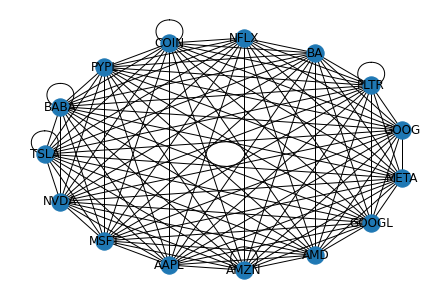

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.from_pandas_adjacency(adjacencyMatrix)
graph.name = "Stock Network"
nx.draw_shell(graph, with_labels=True)

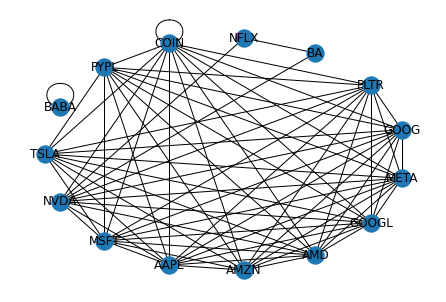

In [10]:
import math
for edge in graph.edges:
  if math.isnan(graph.edges[edge[0], edge[1]]['weight']):
    graph.remove_edge(edge[0],edge[1])
nx.draw_shell(graph, with_labels=True)

# Next Steps:
1. Read "A Network Perspective..."
2. Current final result is Table with cross correlation.
3. Construct graph by setting opposite of correlation as distance between nodes

# Current:
- Have "adjacency", or rather "distance", matrix calculated by inversing correlation between nodes (stocks).

# Attempt 1
Going to directly implement CPR TOPSIS method
Steps:
- Done ~~Shortest Path and Number of shortest path between each node (using distance matrix previously calcualted)~~
- 3.1: Node Communication Probability sequence
- 3.2: New Node Correlation matrix based on relative entropy
- 3.3: CPR TOPSIS algorithm

In [12]:
shortestPathLengths = dict(nx.all_pairs_dijkstra_path_length(graph))
shortestPathCount = dict()
for pair in itertools.product(stockNames, repeat=2):
  source, target = pair
  if source not in shortestPathCount:
    shortestPathCount[source] = dict()
  try:
    shortestPathCount[source][target] = sum([1 for p in nx.all_shortest_paths(graph, source, target, weight=lambda x,y,e: adjacencyMatrix[x][y])])
  except:
    shortestPathCount[source][target] = 0

# Convert to DataFrame. Might not be needed.
shortestPathLengths = pd.DataFrame(shortestPathLengths)
shortestPathCount = pd.DataFrame(shortestPathCount)
shortestPathLengths

,TSLA,NVDA,MSFT,AAPL,AMZN,AMD,GOOGL,META,GOOG,PLTR,BA,NFLX,COIN,PYPL,BABA
TSLA,0.000000,0.628351,0.305362,0.198932,0.096984,0.339305,0.187266,0.407090,0.187016,0.265737,1.371364,1.374667,0.247650,0.221496,NaN
AMZN,0.096984,0.531367,0.208378,0.206358,0.000000,0.242321,0.090281,0.310106,0.090032,0.168752,1.274380,1.277683,0.150666,0.124512,NaN
GOOG,0.187016,0.441335,0.118346,0.296390,0.090032,0.152290,0.000250,0.220074,0.000000,0.139643,1.184348,1.187651,0.177679,0.214543,NaN
GOOGL,0.187266,0.441085,0.118096,0.296640,0.090281,0.152040,0.000000,0.219825,0.000250,0.139393,1.184099,1.187401,0.177429,0.214793,NaN
AAPL,0.198932,0.538107,0.215118,0.000000,0.206358,0.319965,0.296640,0.401451,0.296390,0.354833,1.281121,1.284423,0.355880,0.224757,NaN
PYPL,0.221496,0.624339,0.332889,0.224757,0.124512,0.366833,0.214793,0.434618,0.214543,0.290578,1.367352,1.370655,0.174401,0.000000,NaN
COIN,0.247650,0.449937,0.268436,0.355880,0.150666,0.329469,0.177429,0.367643,0.177679,0.116177,1.192951,1.196253,0.000000,0.174401,NaN
PLTR,0.265737,0.485782,0.207422,0.354833,0.168752,0.291433,0.139393,0.353848,0.139643,0.000000,1.228795,1.232098,0.116177,0.290578,NaN
MSFT,0.305362,0.322989,0.000000,0.215118,0.208378,0.104847,0.118096,0.186333,0.118346,0.207422,1.066003,1.069305,0.268436,0.332889,NaN
AMD,0.339305,0.334836,0.104847,0.319965,0.242321,0.000000,0.152040,0.161175,0.152290,0.291433,1.077849,1.081152,0.329469,0.366833,NaN


In [13]:
# 3.1 Node Communication Probablity Sequence

# Communictaion Probablity Matrix (H)
H = pd.DataFrame(columns=stockNames, index=stockNames)

for pair in itertools.product(stockNames, repeat=2):
  source, target = pair
  if source == target:
    H.at[source, target]= 0.0
    continue
  else:
    H.at[source, target] = shortestPathCount.at[source, target] * 1/shortestPathLengths.at[source, target]
H

,TSLA,NVDA,MSFT,AAPL,AMZN,AMD,GOOGL,META,GOOG,PLTR,BA,NFLX,COIN,PYPL,BABA
TSLA,0.0,1.591467,3.274804,5.026839,10.310964,2.947197,5.340009,2.456457,5.347139,3.763125,0.729201,0.727449,4.037956,4.514761,NaN
NVDA,1.591467,0.0,3.096079,1.858366,1.881939,2.986538,2.267135,2.640168,2.265852,2.058537,1.345871,1.339915,2.222531,1.601695,NaN
MSFT,3.274804,3.096079,0.0,4.648611,4.79898,9.537751,8.467677,5.366737,8.449809,4.821086,0.938084,0.935187,3.725276,3.004003,NaN
AAPL,5.026839,1.858366,4.648611,0.0,4.845946,3.125346,3.371095,2.490964,3.373935,2.818226,0.780567,0.77856,2.809938,4.449247,NaN
AMZN,10.310964,1.881939,4.79898,4.845946,0.0,4.126752,11.07647,3.224702,11.107193,5.92584,0.784695,0.782667,6.637202,8.031385,NaN
AMD,2.947197,2.986538,9.537751,3.125346,4.126752,0.0,6.577223,6.204449,6.566437,3.431323,0.927774,0.92494,3.03519,2.726037,NaN
GOOGL,5.340009,2.267135,8.467677,3.371095,11.07647,6.577223,0.0,4.549079,4004.398773,7.173968,0.844524,0.842175,5.636064,4.655645,NaN
META,2.456457,2.640168,5.366737,2.490964,3.224702,6.204449,4.549079,0.0,4.543917,2.826069,0.891443,0.888826,2.72003,2.300873,NaN
GOOG,5.347139,2.265852,8.449809,3.373935,11.107193,6.566437,4004.398773,4.543917,0.0,7.161138,0.844346,0.841998,5.628143,4.661064,NaN
PLTR,3.763125,2.058537,4.821086,2.818226,5.92584,3.431323,7.173968,2.826069,7.161138,0.0,0.813805,0.811624,8.607566,3.441415,NaN


In [14]:
L = shortestPathLengths.max().max()
L

1.3746668708402554

# Notes
Currently, the distances are very small ie. mostly between 0-2
This might cause a problem in the calculation of the probablity sequence P

P = [p(1), p(2) ... p(L)]

Because, then only p(1) will be valid (L = 1.6..., thus no value for p(2) will be valid)

And even then, p(1) will be 10^-3 for most nodes as their max distance (ri) might be less than one.

## Possible Solution:
Multiply the distances by a factor of 10 to get richer information about their subtle differences without messing up whihc node is "most" important

In [15]:
adjacencyMatrix = adjacencyMatrix * 10
adjacencyMatrix
# Go back and run NetworkX graph code

,TSLA,NVDA,MSFT,AAPL,AMZN,AMD,GOOGL,META,GOOG,PLTR,BA,NFLX,COIN,PYPL,BABA
TSLA,NaN,NaN,3.402776,1.989322,0.969841,4.713404,2.002574,4.731874,2.005704,2.747946,NaN,NaN,3.228876e+00,2.870044,NaN
NVDA,NaN,0.000000,3.229892,7.637459,NaN,3.348358,7.353893,3.787638,7.480107,4.857819,7.430134,7.463159,4.499374e+00,NaN,NaN
MSFT,3.402776,3.229892,0.000000,2.151180,2.121041,1.048465,1.180961,1.863330,1.192624,2.074221,NaN,NaN,2.684365e+00,4.132234,NaN
AAPL,1.989322,7.637459,2.151180,0.000000,2.063580,4.473728,3.584798,6.274378,3.579754,3.548331,NaN,NaN,3.558797e+00,2.247571,NaN
AMZN,0.969841,NaN,2.121041,2.063580,NaN,3.347846,0.926767,4.023455,0.900317,1.687524,NaN,NaN,1.506659e+00,1.245115,NaN
AMD,4.713404,3.348358,1.048465,4.473728,3.347846,0.000000,1.520399,1.611747,1.554141,3.594437,NaN,NaN,3.778917e+00,5.531095,NaN
GOOGL,2.002574,7.353893,1.180961,3.584798,0.926767,1.520399,0.000000,2.198247,0.002497,1.393929,NaN,NaN,1.774288e+00,3.208063,NaN
META,4.731874,3.787638,1.863330,6.274378,4.023455,1.611747,2.198247,0.000000,2.212296,3.538484,NaN,NaN,3.676431e+00,8.065444,NaN
GOOG,2.005704,7.480107,1.192624,3.579754,0.900317,1.554141,0.002497,2.212296,0.000000,1.433584,NaN,NaN,1.802414e+00,3.175830,NaN
PLTR,2.747946,4.857819,2.074221,3.548331,1.687524,3.594437,1.393929,3.538484,1.433584,NaN,NaN,NaN,1.161769e+00,3.612025,NaN


In [16]:
P = dict()
r = shortestPathLengths.max()
# stock = 'TSLA'
# l=2
# print(list(shortestPathLengths[stock][shortestPathLengths[stock] <= l].index))
# H[stock][list(shortestPathLengths[stock][shortestPathLengths[stock] <= l].index)]

for stock in stockNames:
  P[stock] = []
  for l in range(1, math.ceil(L)):
    if l > r[stock]:
      val = 10**(-3)
    else:
      denominator = H[stock].sum() - H.at[stock,stock] #Should just be 0
      l_th_layer_neighborhood = list(shortestPathLengths[stock][shortestPathLengths[stock] <= l].index) # Confirm Definition of Lth layer neighborhood
      numerator = H[stock][l_th_layer_neighborhood].sum()

      val = numerator / denominator + (10** (-3) if numerator == 0 else 0)

    P[stock].append(val)
P

{'TSLA': [0.9709062045898256],
 'NVDA': [0.001],
 'MSFT': [0.9693228714958358],
 'AAPL': [0.9613863952651688],
 'AMZN': [0.9786854190355178],
 'AMD': [0.9651201197607794],
 'GOOGL': [0.999585088186619],
 'META': [0.9566883786263923],
 'GOOG': [0.9995851745215548],
 'PLTR': [0.9697051961332745],
 'BA': [0.39732760885367713],
 'NFLX': [0.39774985471021296],
 'COIN': [0.9680910118979817],
 'PYPL': [0.9686369859788654],
 'BABA': [0.001]}

# Notes
- Confirm definition of L-th Layer neighborhood
- Say L is 16.5, so should it be rounded up always to p(17) or limited down to p(16)
- How to handle log(0) in relative entropy? For now adding 0.001 similar to the case when l>ri

In [17]:
# 3.2 Correlation matrix based on relative entorpy

# Symmetric Correlation Matrix (U)
print(P,'\n---------------------------')
U = pd.DataFrame(index=stockNames, columns=stockNames)
for pair in itertools.product(stockNames, repeat=2):
  i, j = pair
  u_corr = 0
  for l in range(1, math.ceil(L)):
    try:
      u_corr += P[i][l-1] * math.log(P[i][l-1]/P[j][l-1])
      u_corr += P[j][l-1] * math.log(P[j][l-1]/P[i][l-1])
    except:
      print(i,j, l)
      print(P[j])
      print(P[j][l-1],P[i][l-1])
  U.at[i,j] = u_corr
U

{'TSLA': [0.9709062045898256], 'NVDA': [0.001], 'MSFT': [0.9693228714958358], 'AAPL': [0.9613863952651688], 'AMZN': [0.9786854190355178], 'AMD': [0.9651201197607794], 'GOOGL': [0.999585088186619], 'META': [0.9566883786263923], 'GOOG': [0.9995851745215548], 'PLTR': [0.9697051961332745], 'BA': [0.39732760885367713], 'NFLX': [0.39774985471021296], 'COIN': [0.9680910118979817], 'PYPL': [0.9686369859788654], 'BABA': [0.001]} 
---------------------------


,TSLA,NVDA,MSFT,AAPL,AMZN,AMD,GOOGL,META,GOOG,PLTR,BA,NFLX,COIN,PYPL,BABA
TSLA,0.0,6.671238,0.000003,0.000094,0.000062,0.000035,0.000835,0.00021,0.000835,0.000001,0.512475,0.511488,0.000008,0.000005,6.671238
NVDA,6.671238,0.0,6.658767,6.596295,6.732547,6.625677,6.897567,6.559346,6.897568,6.661778,2.371926,2.374875,6.649066,6.653365,0.0
MSFT,0.000003,6.658767,0.0,0.000065,0.00009,0.000018,0.00093,0.000166,0.00093,0.0,0.510126,0.509143,0.000002,0.0,6.658767
AAPL,0.000094,6.596295,0.000065,0.0,0.000309,0.000014,0.001488,0.000023,0.001488,0.000072,0.498411,0.497439,0.000047,0.000054,6.596295
AMZN,0.000062,6.732547,0.00009,0.000309,0.0,0.000189,0.000442,0.0005,0.000442,0.000083,0.524064,0.523067,0.000115,0.000104,6.732547
AMD,0.000035,6.625677,0.000018,0.000014,0.000189,0.0,0.001209,0.000074,0.001209,0.000022,0.503911,0.502934,0.000009,0.000013,6.625677
GOOGL,0.000835,6.897567,0.00093,0.001488,0.000442,0.001209,0.0,0.001882,0.0,0.000907,0.55563,0.554601,0.001008,0.000973,6.897567
META,0.00021,6.559346,0.000166,0.000023,0.0005,0.000074,0.001882,0.0,0.001882,0.000176,0.49152,0.490555,0.000135,0.000148,6.559346
GOOG,0.000835,6.897568,0.00093,0.001488,0.000442,0.001209,0.0,0.001882,0.0,0.000907,0.55563,0.554602,0.001008,0.000973,6.897568
PLTR,0.000001,6.661778,0.0,0.000072,0.000083,0.000022,0.000907,0.000176,0.000907,0.0,0.510693,0.509709,0.000003,0.000001,6.661778


In [18]:
S = 1 - U / U.max().max()
S

,TSLA,NVDA,MSFT,AAPL,AMZN,AMD,GOOGL,META,GOOG,PLTR,BA,NFLX,COIN,PYPL,BABA
TSLA,1.0,0.032813,1.0,0.999986,0.999991,0.999995,0.999879,0.99997,0.999879,1.0,0.925702,0.925845,0.999999,0.999999,0.032813
NVDA,0.032813,1.0,0.034621,0.043678,0.023924,0.039418,0.0,0.049035,0.0,0.034184,0.656121,0.655694,0.036027,0.035404,1.0
MSFT,1.0,0.034621,1.0,0.999991,0.999987,0.999997,0.999865,0.999976,0.999865,1.0,0.926043,0.926185,1.0,1.0,0.034621
AAPL,0.999986,0.043678,0.999991,1.0,0.999955,0.999998,0.999784,0.999997,0.999784,0.99999,0.927741,0.927882,0.999993,0.999992,0.043678
AMZN,0.999991,0.023924,0.999987,0.999955,1.0,0.999973,0.999936,0.999928,0.999936,0.999988,0.924022,0.924166,0.999983,0.999985,0.023924
AMD,0.999995,0.039418,0.999997,0.999998,0.999973,1.0,0.999825,0.999989,0.999825,0.999997,0.926944,0.927085,0.999999,0.999998,0.039418
GOOGL,0.999879,0.0,0.999865,0.999784,0.999936,0.999825,1.0,0.999727,1.0,0.999869,0.919445,0.919595,0.999854,0.999859,0.0
META,0.99997,0.049035,0.999976,0.999997,0.999928,0.999989,0.999727,1.0,0.999727,0.999974,0.92874,0.92888,0.99998,0.999978,0.049035
GOOG,0.999879,0.0,0.999865,0.999784,0.999936,0.999825,1.0,0.999727,1.0,0.999869,0.919445,0.919595,0.999854,0.999859,0.0
PLTR,1.0,0.034184,1.0,0.99999,0.999988,0.999997,0.999869,0.999974,0.999869,1.0,0.92596,0.926103,1.0,1.0,0.034184


In [19]:
# 3.3 CPR TOPSIS

# Creating Adjacency Matrix. If nodes are adjacent, A(i,j) = S(i,j)
A = pd.DataFrame(index = stockNames, columns = stockNames)
for pair in itertools.product(stockNames, repeat=2):
  i, j = pair
  if math.isnan(adjacencyMatrix.at[i,j]) and i!=j:
    A.at[i,j] = 0.0
  else:
    A.at[i,j] = S.at[i,j]
A

,TSLA,NVDA,MSFT,AAPL,AMZN,AMD,GOOGL,META,GOOG,PLTR,BA,NFLX,COIN,PYPL,BABA
TSLA,1.0,0.0,1.0,0.999986,0.999991,0.999995,0.999879,0.99997,0.999879,1.0,0.0,0.0,0.999999,0.999999,0.0
NVDA,0.0,1.0,0.034621,0.043678,0.0,0.039418,0.0,0.049035,0.0,0.034184,0.656121,0.655694,0.036027,0.0,0.0
MSFT,1.0,0.034621,1.0,0.999991,0.999987,0.999997,0.999865,0.999976,0.999865,1.0,0.0,0.0,1.0,1.0,0.0
AAPL,0.999986,0.043678,0.999991,1.0,0.999955,0.999998,0.999784,0.999997,0.999784,0.99999,0.0,0.0,0.999993,0.999992,0.0
AMZN,0.999991,0.0,0.999987,0.999955,1.0,0.999973,0.999936,0.999928,0.999936,0.999988,0.0,0.0,0.999983,0.999985,0.0
AMD,0.999995,0.039418,0.999997,0.999998,0.999973,1.0,0.999825,0.999989,0.999825,0.999997,0.0,0.0,0.999999,0.999998,0.0
GOOGL,0.999879,0.0,0.999865,0.999784,0.999936,0.999825,1.0,0.999727,1.0,0.999869,0.0,0.0,0.999854,0.999859,0.0
META,0.99997,0.049035,0.999976,0.999997,0.999928,0.999989,0.999727,1.0,0.999727,0.999974,0.0,0.0,0.99998,0.999978,0.0
GOOG,0.999879,0.0,0.999865,0.999784,0.999936,0.999825,1.0,0.999727,1.0,0.999869,0.0,0.0,0.999854,0.999859,0.0
PLTR,1.0,0.034184,1.0,0.99999,0.999988,0.999997,0.999869,0.999974,0.999869,1.0,0.0,0.0,1.0,1.0,0.0


# Note
Maybe NetworkX has many of the functions already implemented. Ask Prof if we can use those?

Using betweeness centrality for "shortest path centrality" mentioned in research paper.

Limit precision in calculation. Causing errors such as AdjacencyMatrix(AMZN, AMZN) being NaN.

In [20]:
# Using generated Code. Semi local Centrality

def semi_local_centrality(G, node):
    neighborhood = set(nx.all_neighbors(G, node))
    neighborhood
    subgraph = G.subgraph(neighborhood)
    semi_local = sum([nx.shortest_path_length(subgraph, node, n) for n in neighborhood])
    semi_local /= len(neighborhood)
    return semi_local

G = nx.from_pandas_adjacency(A.astype('float64'))
semi_local_centralities = {node: semi_local_centrality(G, node) for node in G.nodes()}
semi_local_centralities


{'TSLA': 0.9090909090909091,
 'NVDA': 0.9,
 'MSFT': 0.9166666666666666,
 'AAPL': 0.9166666666666666,
 'AMZN': 0.9090909090909091,
 'AMD': 0.9166666666666666,
 'GOOGL': 0.9166666666666666,
 'META': 0.9166666666666666,
 'GOOG': 0.9090909090909091,
 'PLTR': 0.9166666666666666,
 'BA': 0.6666666666666666,
 'NFLX': 0.6666666666666666,
 'COIN': 0.9166666666666666,
 'PYPL': 0.9090909090909091,
 'BABA': 0.0}

In [21]:
# Shortest Path Centrality
shortestPathCentralities = nx.betweenness_centrality(G, weight = "weight")
shortestPathCentralities

{'TSLA': 0.0,
 'NVDA': 0.47252747252747257,
 'MSFT': 0.0,
 'AAPL': 0.0,
 'AMZN': 0.0,
 'AMD': 0.0,
 'GOOGL': 0.13186813186813187,
 'META': 0.0,
 'GOOG': 0.0,
 'PLTR': 0.0,
 'BA': 0.0,
 'NFLX': 0.0,
 'COIN': 0.0,
 'PYPL': 0.0,
 'BABA': 0.0}

In [29]:
G_copy = G.copy()

def hasDegdNodes(g,d):
  for node in g.nodes():
    if g.degree(node) <= d:
      return True
  return False

def getDegdNodes(g,d):
  node_list = []
  for node in g.nodes():
    if g.degree(node) <= d:
      node_list.append(node)
  return node_list

kshell = 1
kshell_iteration_factor = dict()

while len(G_copy.nodes()) > 0:
  # If nodes with degree 1
  if hasDegdNodes(G_copy, kshell):
    # Remove them
    bucket = getDegdNodes(G_copy, kshell)
    for node in bucket:
      G_copy.remove_node(node)
      kshell_iteration_factor[node] = kshell
  # Else
  else:
    # Increase kshell iteration factor by 1
    kshell += 1

kshell_iteration_factor

{'BABA': 2,
 'BA': 4,
 'NFLX': 4,
 'NVDA': 9,
 'TSLA': 12,
 'MSFT': 12,
 'AAPL': 12,
 'AMZN': 12,
 'AMD': 12,
 'GOOGL': 12,
 'META': 12,
 'GOOG': 12,
 'PLTR': 12,
 'COIN': 12,
 'PYPL': 12}

In [62]:
combined = dict()
criteria = ['kshell', 'sp cen.', 'sl cen.']
for name in stockNames:
  sublist = [kshell_iteration_factor[name],
             shortestPathCentralities[name],
             semi_local_centralities[name]]
  combined[name] = sublist

decisionMatrix = pd.DataFrame.from_dict(combined, orient='index', columns=criteria, dtype='float64')

print(f'sp: Shortest Path\nsl: Semi-Local\ncen.: Centrality\n')
decisionMatrix

sp: Shortest Path
sl: Semi-Local
cen.: Centrality



,kshell,sp cen.,sl cen.
TSLA,12.0,0.000000,0.909091
NVDA,9.0,0.472527,0.900000
MSFT,12.0,0.000000,0.916667
AAPL,12.0,0.000000,0.916667
AMZN,12.0,0.000000,0.909091
AMD,12.0,0.000000,0.916667
GOOGL,12.0,0.131868,0.916667
META,12.0,0.000000,0.916667
GOOG,12.0,0.000000,0.909091
PLTR,12.0,0.000000,0.916667


In [65]:
# Normalize the decision Matrix
normalized_decisionMatrix = pd.DataFrame(index=stockNames, columns=criteria, dtype='float64')
for name in stockNames:
  normalization_factor = math.sqrt(sum([x ** 2 for x in decisionMatrix.loc[name]]))
  for col in ['kshell', 'sp cen.', 'sl cen.']:
    normalized_decisionMatrix.at[name,col] = decisionMatrix.at[name,col] / normalization_factor

normalized_decisionMatrix

,kshell,sp cen.,sl cen.
TSLA,0.997143,0.000000,0.075541
NVDA,0.993682,0.052171,0.099368
MSFT,0.997095,0.000000,0.076167
AAPL,0.997095,0.000000,0.076167
AMZN,0.997143,0.000000,0.075541
AMD,0.997095,0.000000,0.076167
GOOGL,0.997035,0.010956,0.076162
META,0.997095,0.000000,0.076167
GOOG,0.997143,0.000000,0.075541
PLTR,0.997095,0.000000,0.076167


In [67]:
PositiveIdeal = normalized_decisionMatrix.max()
NegativeIdeal = normalized_decisionMatrix.min()

In [76]:
weights = dict()
Y = dict()
criteria = ['kshell', 'sp cen.', 'sl cen.']

for col_name, col_data in normalized_decisionMatrix.iteritems():
  Y[col_name] = (-1/math.log(len(stockNames))) * sum([x * math.log(x) if x>0 else 0 for x in col_data])


for col in criteria:
  weights[col] = Y[col] / sum(Y.values())

weights

{'kshell': 0.020061990263040997,
 'sp cen.': 0.06272041015662062,
 'sl cen.': 0.9172175995803383}

# Using TOPSIS Implementation

In [77]:
# https://github.com/Glitchfix/TOPSIS-Python

import numpy as np
import warnings


class Topsis():
    evaluation_matrix = np.array([])  # Matrix
    weighted_normalized = np.array([])  # Weight matrix
    normalized_decision = np.array([])  # Normalisation matrix
    M = 0  # Number of rows
    N = 0  # Number of columns

    '''
	Create an evaluation matrix consisting of m alternatives and n criteria,
	with the intersection of each alternative and criteria given as {\displaystyle x_{ij}}x_{ij},
	we therefore have a matrix {\displaystyle (x_{ij})_{m\times n}}(x_{{ij}})_{{m\times n}}.
	'''

    def __init__(self, evaluation_matrix, weight_matrix, criteria):
        # M×N matrix
        self.evaluation_matrix = np.array(evaluation_matrix, dtype="float")

        # M alternatives (options)
        self.row_size = len(self.evaluation_matrix)

        # N attributes/criteria
        self.column_size = len(self.evaluation_matrix[0])

        # N size weight matrix
        self.weight_matrix = np.array(weight_matrix, dtype="float")
        self.weight_matrix = self.weight_matrix/sum(self.weight_matrix)
        self.criteria = np.array(criteria, dtype="float")

    '''
	# Step 2
	The matrix {\displaystyle (x_{ij})_{m\times n}}(x_{{ij}})_{{m\times n}} is then normalised to form the matrix
	'''

    def step_2(self):
        # normalized scores
        self.normalized_decision = np.copy(self.evaluation_matrix)
        sqrd_sum = np.zeros(self.column_size)
        for i in range(self.row_size):
            for j in range(self.column_size):
                sqrd_sum[j] += self.evaluation_matrix[i, j]**2
        for i in range(self.row_size):
            for j in range(self.column_size):
                self.normalized_decision[i,
                                         j] = self.evaluation_matrix[i, j]/(sqrd_sum[j]**0.5)

    '''
	# Step 3
	Calculate the weighted normalised decision matrix
	'''

    def step_3(self):
        from pdb import set_trace
        self.weighted_normalized = np.copy(self.normalized_decision)
        for i in range(self.row_size):
            for j in range(self.column_size):
                self.weighted_normalized[i, j] *= self.weight_matrix[j]

    '''
	# Step 4
	Determine the worst alternative {\displaystyle (A_{w})}(A_{w}) and the best alternative {\displaystyle (A_{b})}(A_{b}):
	'''

    def step_4(self):
        self.worst_alternatives = np.zeros(self.column_size)
        self.best_alternatives = np.zeros(self.column_size)
        for i in range(self.column_size):
            if self.criteria[i]:
                self.worst_alternatives[i] = min(
                    self.weighted_normalized[:, i])
                self.best_alternatives[i] = max(self.weighted_normalized[:, i])
            else:
                self.worst_alternatives[i] = max(
                    self.weighted_normalized[:, i])
                self.best_alternatives[i] = min(self.weighted_normalized[:, i])

    '''
	# Step 5
	Calculate the L2-distance between the target alternative {\displaystyle i}i and the worst condition {\displaystyle A_{w}}A_{w}
	{\displaystyle d_{iw}={\sqrt {\sum _{j=1}^{n}(t_{ij}-t_{wj})^{2}}},\quad i=1,2,\ldots ,m,}
	and the distance between the alternative {\displaystyle i}i and the best condition {\displaystyle A_{b}}A_b
	{\displaystyle d_{ib}={\sqrt {\sum _{j=1}^{n}(t_{ij}-t_{bj})^{2}}},\quad i=1,2,\ldots ,m}
	where {\displaystyle d_{iw}}d_{{iw}} and {\displaystyle d_{ib}}d_{{ib}} are L2-norm distances 
	from the target alternative {\displaystyle i}i to the worst and best conditions, respectively.
	'''

    def step_5(self):
        self.worst_distance = np.zeros(self.row_size)
        self.best_distance = np.zeros(self.row_size)

        self.worst_distance_mat = np.copy(self.weighted_normalized)
        self.best_distance_mat = np.copy(self.weighted_normalized)

        sqrd_sum = np.zeros(self.column_size)
        for i in range(self.row_size):
            for j in range(self.column_size):
                sqrd_sum[j] += self.evaluation_matrix[i, j]**2

        for i in range(self.row_size):
            for j in range(self.column_size):
                self.worst_distance_mat[i][j] = ((self.weighted_normalized[i][j]-self.worst_alternatives[j]) / sqrd_sum[j]**0.5)**2
                self.best_distance_mat[i][j] = ((self.weighted_normalized[i][j]-self.best_alternatives[j]) / sqrd_sum[j]**0.5)**2
                
                self.worst_distance[i] += self.worst_distance_mat[i][j]
                self.best_distance[i] += self.best_distance_mat[i][j]

        for i in range(self.row_size):
            self.worst_distance[i] = self.worst_distance[i]**0.5
            self.best_distance[i] = self.best_distance[i]**0.5

    '''
	# Step 6
	Calculate the similarity
	'''

    def step_6(self):
        np.seterr(all='ignore')
        self.worst_similarity = np.zeros(self.row_size)
        self.best_similarity = np.zeros(self.row_size)

        for i in range(self.row_size):
            # calculate the similarity to the worst condition
            self.worst_similarity[i] = self.worst_distance[i] / \
                (self.worst_distance[i]+self.best_distance[i])

            # calculate the similarity to the best condition
            self.best_similarity[i] = self.best_distance[i] / \
                (self.worst_distance[i]+self.best_distance[i])
    
    def ranking(self, data):
        return [i+1 for i in data.argsort()]

    def rank_to_worst_similarity(self):
        # return rankdata(self.worst_similarity, method="min").astype(int)
        return self.ranking(self.worst_similarity)

    def rank_to_best_similarity(self):
        # return rankdata(self.best_similarity, method='min').astype(int)
        return self.ranking(self.best_similarity)

    def calc(self):
        print("Step 1\n", self.evaluation_matrix, end="\n\n")
        self.step_2()
        print("Step 2\n", self.normalized_decision, end="\n\n")
        self.step_3()
        print("Step 3\n", self.weighted_normalized, end="\n\n")
        self.step_4()
        print("Step 4\n", self.worst_alternatives,
              self.best_alternatives, end="\n\n")
        self.step_5()
        print("Step 5\n", self.worst_distance, self.best_distance, end="\n\n")
        self.step_6()
        print("Step 6\n", self.worst_similarity,
              self.best_similarity, end="\n\n")

In [81]:
evaluation_matrix = decisionMatrix
criteria_direction = [True, True, True]

weights_list = list(weights.values())
t = Topsis(evaluation_matrix, weights_list, criteria_direction)
t.calc()
rankings = t.rank_to_worst_similarity()

Step 1
 [[12.          0.          0.90909091]
 [ 9.          0.47252747  0.9       ]
 [12.          0.          0.91666667]
 [12.          0.          0.91666667]
 [12.          0.          0.90909091]
 [12.          0.          0.91666667]
 [12.          0.13186813  0.91666667]
 [12.          0.          0.91666667]
 [12.          0.          0.90909091]
 [12.          0.          0.91666667]
 [ 4.          0.          0.66666667]
 [ 4.          0.          0.66666667]
 [12.          0.          0.91666667]
 [12.          0.          0.90909091]
 [ 2.          0.          0.        ]]

Step 2
 [[0.29095719 0.         0.27552487]
 [0.21821789 0.9631963  0.27276963]
 [0.29095719 0.         0.27782092]
 [0.29095719 0.         0.27782092]
 [0.29095719 0.         0.27552487]
 [0.29095719 0.         0.27782092]
 [0.29095719 0.26879897 0.27782092]
 [0.29095719 0.         0.27782092]
 [0.29095719 0.         0.27552487]
 [0.29095719 0.         0.27782092]
 [0.09698573 0.         0.20205157]
 

In [83]:
pd.DataFrame(rankings,index=stockNames)

,0
TSLA,15
NVDA,11
MSFT,12
AAPL,1
AMZN,5
AMD,9
GOOGL,14
META,3
GOOG,4
PLTR,6
